Zaimplementować algorytm Johnsona do szukania odegłości pomiędzy wszystkimi parami wierzchołków na ważonym grafie skierowanym.

In [1]:
def johnson(self):
    csr_adj_matrix = csr_matrix(self.adjacencyMatrix)
    try:                
        dist_from_source, predecessors = bellman_ford(csr_adj_matrix, return_predecessors=True)
    except Exception as e:
        print("Graph contains a negative weight cycle")
        return None
    for i in range(self.adjacencyMatrix.shape[0]):
        for j in range(self.adjacencyMatrix.shape[1]):
            if self.adjacencyMatrix[i, j] != 0:
                self.adjacencyMatrix[i, j] += dist_from_source[i, i] - dist_from_source[j, j]
    D, predecessors = dijkstra(csr_adj_matrix, return_predecessors=True)
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            if D[i, j] != 0:
                D[i, j] += dist_from_source[j, j] - dist_from_source[i, i]
    return D

In [2]:
import numpy as np
import random
from scipy.sparse.csgraph import dijkstra, bellman_ford
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import networkx as nx

class dGraph:
    def __init__(self,adjacencyList):
        self.adjacencyList = adjacencyList
        self.adjacencyMatrix = self.toAdjacencyMatrix(adjacencyList)
        self.incidenceMatrix = self.toIncidenceMatrix(adjacencyList)
        
    def toAdjacencyMatrix(self,adjacencyList):
        n = len(adjacencyList)
        adjacencyMatrix = np.zeros((n,n))
        for i in range(n):
            for neib in adjacencyList[i]:
                adjacencyMatrix[i][neib] = 1
        return adjacencyMatrix
        
    def toIncidenceMatrix(self,adjacencyList):
        n = len(adjacencyList)
        incidenceMatrix = []
        for i in range(len(adjacencyList)):
            for neib in adjacencyList[i]:
                newEdge = [0 for i in range(n)]
                newEdge[i] = -1
                newEdge[neib] = 1
                incidenceMatrix.append(newEdge)
        return np.array(incidenceMatrix).transpose()
        
    def getRandomDGraph(n,p):
        adjacencyList = []
        for i in range(n):
            neibList = []
            for j in range(n):
                random_float = random.random()
                if p>=random_float and j!=i:
                    neibList.append(j)
            adjacencyList.append(neibList)
        return dGraph(adjacencyList)

    def visualize(self):
        G = nx.DiGraph()
        for node in range(len(self.adjacencyList)):
            G.add_node(node)
        for node, edges in enumerate(self.adjacencyList):
            for edge in edges:
                G.add_edge(node, edge)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues)
        plt.show()
        
    def johnson(self):
        csr_adj_matrix = csr_matrix(self.adjacencyMatrix)
        try:
            dist_from_source, predecessors = bellman_ford(csr_adj_matrix, return_predecessors=True)
        except Exception as e:
            print("Graph contains a negative weight cycle")
            return None
        for i in range(self.adjacencyMatrix.shape[0]):
            for j in range(self.adjacencyMatrix.shape[1]):
                if self.adjacencyMatrix[i, j] != 0:
                    self.adjacencyMatrix[i, j] += dist_from_source[i, i] - dist_from_source[j, j]
        D, predecessors = dijkstra(csr_adj_matrix, return_predecessors=True)
        for i in range(D.shape[0]):
            for j in range(D.shape[1]):
                if D[i, j] != 0:
                    D[i, j] += dist_from_source[j, j] - dist_from_source[i, i]
        return D

Node 0: [(0, 0.0), (1, inf), (2, inf), (3, inf), (4, inf), (5, inf), (6, 1.0)]
Node 1: [(0, 1.0), (1, 0.0), (2, 1.0), (3, inf), (4, 2.0), (5, 1.0), (6, 1.0)]
Node 2: [(0, 2.0), (1, 1.0), (2, 0.0), (3, inf), (4, 2.0), (5, 1.0), (6, 2.0)]
Node 3: [(0, 3.0), (1, 2.0), (2, 1.0), (3, 0.0), (4, 1.0), (5, 2.0), (6, 3.0)]
Node 4: [(0, 3.0), (1, 2.0), (2, 1.0), (3, inf), (4, 0.0), (5, 2.0), (6, 3.0)]
Node 5: [(0, 4.0), (1, 3.0), (2, 2.0), (3, inf), (4, 1.0), (5, 0.0), (6, 4.0)]
Node 6: [(0, 1.0), (1, inf), (2, inf), (3, inf), (4, inf), (5, inf), (6, 0.0)]


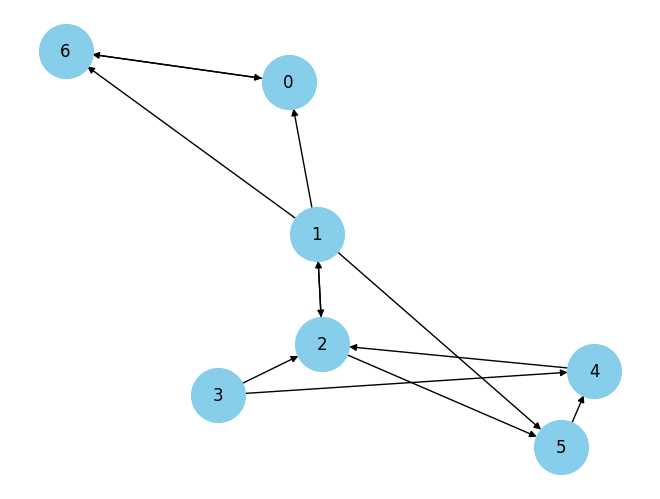

In [3]:
def main():
    graph = dGraph([[6],[0,2,5,6],[1,5],[2,4],[2],[4],[0]])
    D = graph.johnson()
    for i in range(D.shape[0]):
        print(f"Node {i}: {[(j, D[i, j]) for j in range(D.shape[1])]}")
    graph.visualize()

if __name__ == '__main__':
    main()